# 100 Year Dataset Mini-Investigation
We explore the 100 year netcdf file for fun and practice!

In [73]:
# Import libraries
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib

In [3]:
data = nc.Dataset("../data/snw.livneh.mon.nam-44i_con.1915-2011.nc", "r")
data.variables;


In [4]:
x = data["longitude"][:]
y = data["latitude"][:]
snw = data["snw"][:]

1916-04-16


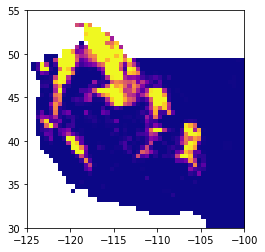

In [5]:
# get subset so we  can zoom on graph
latbounds = [30 , 55]
lonbounds = [-125 , -100]

# latitude lower and upper index
lat_lower = np.argmin(np.abs(y - latbounds[0]))
lat_upper = np.argmin(np.abs(y - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x - lonbounds[0]))
lon_upper = np.argmin(np.abs(x - lonbounds[1]))

# colormap - color NaNs gray, select nicer plot style
current_cmap = plt.cm.get_cmap('Accent') #plt.style.available to find avaiable images
current_cmap.set_bad(color='gray')

plt.imshow(snw[15][lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=plt.get_cmap("plasma"), aspect="equal", vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
date = dt.date(year=1915, month=1, day=1)+dt.timedelta(days=int(data["time"][15].data))
print(date)

In [30]:
d = {}
for year in range(1916,2000):
    # get month arrays of SWE for a given winter season
    ar = [snw[i][lat_lower:lat_upper, lon_lower:lon_upper] for i in range(1164) if 
             abs((dates[i]-dt.date(year=year, month=1, day=1)).days) <125]
    # take maximum over season
    maxi = np.maximum.reduce(ar)
    d[year] = maxi # add to dict

In [234]:
decade_mean = {}
for decade in range(1920, 2001,10):
    years = range(decade-5, decade+4) # years in that decade
    ar = [d[year] for year in years if year in list(d.keys())] # select data
    decade_mean[decade] = np.mean(ar, axis=0) # mean 

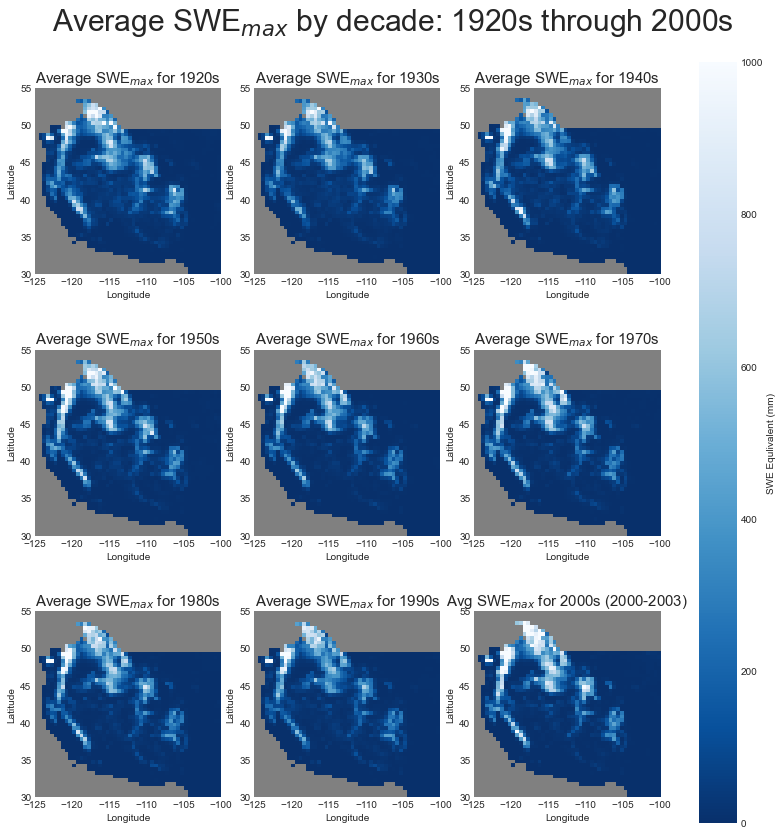

In [228]:
fig, ax = plt.subplots(3,3, figsize=(14,14))
fig.subplots_adjust(hspace=0.10, wspace=0.18)

ax = ax.ravel() # ravel for easy plotting

# color map and plot style 
snow_cmap = matplotlib.cm.get_cmap('Blues_r')
snow_cmap.set_bad(color='gray')
vmax = 1000
for ind, decade in enumerate(list(decade_mean.keys())):
    data = np.where(decade_mean[decade] > 1e+19, np.nan, decade_mean[decade])
    ax[ind].imshow(data,  origin='lower', 
               cmap=snow_cmap, aspect="equal", vmin=0, vmax=vmax,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
    # set axis labels
    ax[ind].set_title(r'Average SWE$_{{max}}$ for {}s'.format(decade), fontsize=15)
    if decade==2000:
        ax[ind].set_title(r'Avg SWE$_{{max}}$ for {}s (2000-2003)'.format(decade),
                         fontsize=15)
    ax[ind].set_xlabel("Longitude")
    ax[ind].set_ylabel("Latitude")
fig.suptitle(r'Average SWE$_{{max}}$ by decade: 1920s through 2000s', fontsize=30, 
             y=0.935, x=0.48);
fig.colorbar(matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
                            norm=matplotlib.colors.Normalize(vmin=0, vmax=vmax)),
             ax=ax, label="SWE Equlivalent (mm)")

fig.savefig("../plots/average_SWE_by_decade.png", dpi=250);

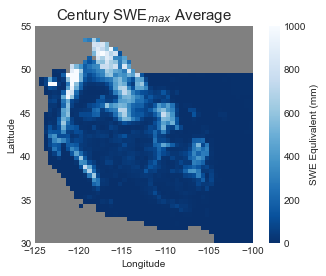

In [229]:
century_mean = np.mean(list(decade_mean.values()),axis=0)
century_mean = np.where(century_mean > 1e+19,np.nan, century_mean)
plt.imshow(century_mean,  origin='lower', 
               cmap=snow_cmap, aspect="equal", vmin=0, vmax=vmax,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
plt.title(r'Century SWE$_{{max}}$ Average', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(matplotlib.cm.ScalarMappable(cmap= snow_cmap, 
                            norm=matplotlib.colors.Normalize(vmin=0, vmax=vmax)),
              label="SWE Equlivalent (mm)")
plt.savefig("../plots/Century_SWE_average.png",dpi=250)

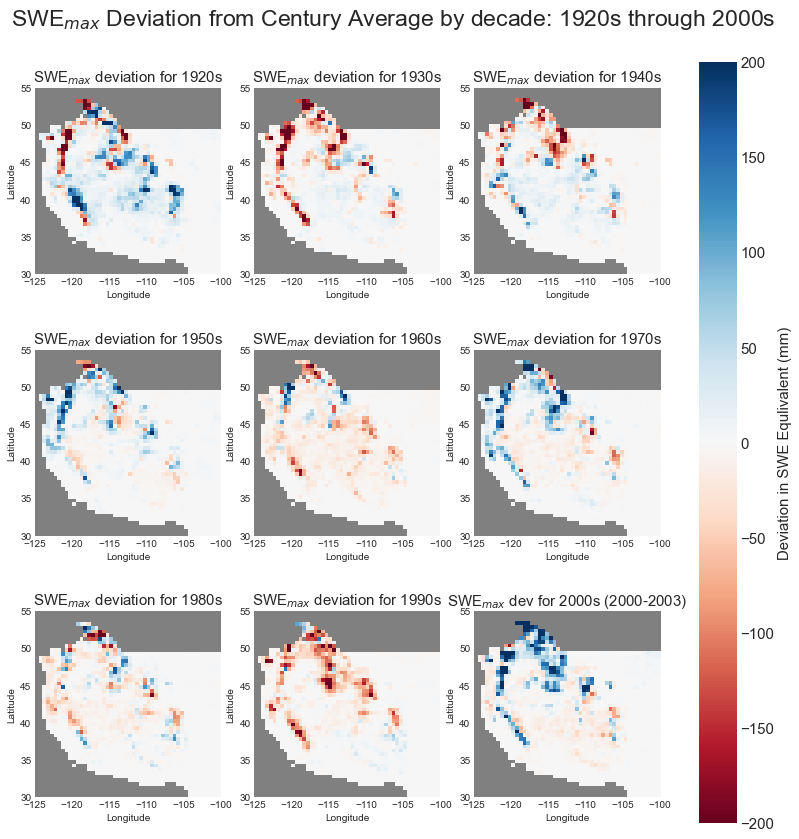

In [261]:
# plot variation in SWE by decade compared to century mean
fig, ax = plt.subplots(3,3, figsize=(14,14))
fig.subplots_adjust(hspace=0.10, wspace=0.18)

ax = ax.ravel() # ravel for easy plotting

# color map and plot style 
diff_cmap = matplotlib.cm.get_cmap('RdBu')
diff_cmap.set_bad(color='gray')
for ind, decade in enumerate(list(decade_mean.keys())):
    decade_data = np.where(decade_mean[decade] > 1e+19, np.nan, decade_mean[decade])
    ax[ind].imshow(decade_data-century_mean,  origin='lower', 
           cmap=diff_cmap, aspect="equal", vmin=-200, vmax=200,
           extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
    ax[ind].set_title(r'SWE$_{{max}}$ deviation for {}s'.format(decade), 
                      fontsize=15)
    if decade==2000:
        ax[ind].set_title(r'SWE$_{{max}}$ dev for {}s (2000-2003)'.format(decade),
                         fontsize=15)
    ax[ind].set_xlabel("Longitude")
    ax[ind].set_ylabel("Latitude")
fig.suptitle(r'SWE$_{{max}}$ Deviation from Century Average by decade: 1920s through 2000s',
             fontsize=23, y=0.935, x=0.48);
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap= diff_cmap, 
                            norm=matplotlib.colors.Normalize(vmin=-200, vmax=200)),
             ax=ax);
cbar.set_label("Deviation in SWE Equlivalent (mm)", size=15)
cbar.ax.tick_params(labelsize=15)
fig.savefig("../plots/SWE_max_century_deviation.png", dpi=250)